18089


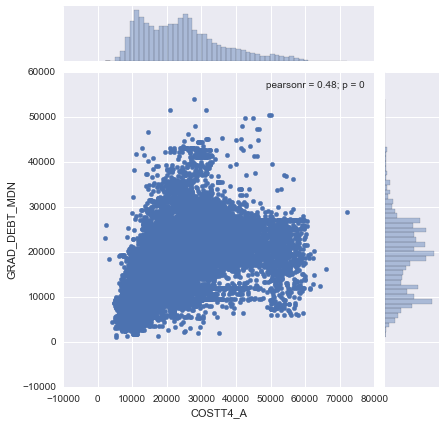

In [18]:
import itertools
import pandas as pd
import seaborn as sns

%matplotlib inline

# First value is the independent variable, second value is the dependent
COLUMNS = ['COSTT4_A', 'GRAD_DEBT_MDN']
YEARS = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

FILE_PATHS = ['./datasets/merged_1996_PP.csv', './datasets/merged_1997_PP.csv', './datasets/merged_1998_PP.csv',
         './datasets/merged_1999_PP.csv', './datasets/merged_2000_PP.csv', './datasets/merged_2001_PP.csv',
         './datasets/merged_2002_PP.csv', './datasets/merged_2003_PP.csv', './datasets/merged_2004_PP.csv', 
         './datasets/merged_2005_PP.csv', './datasets/merged_2006_PP.csv', './datasets/merged_2007_PP.csv', 
             './datasets/merged_2008_PP.csv', './datasets/merged_2009_PP.csv', './datasets/merged_2010_PP.csv', 
             './datasets/merged_2011_PP.csv', './datasets/merged_2012_PP.csv', './datasets/merged_2013_PP.csv', ]

combined_df = []

for index, path in enumerate(FILE_PATHS):
    df = pd.read_csv(path, low_memory=False)
    df['year'] = list(itertools.repeat(YEARS[index],len(df)))
    combined_df.append(df)

combined_df = pd.concat(combined_df)

# Subset that bitch
combined_df = combined_df[COLUMNS].dropna(subset = COLUMNS)
combined_df = combined_df.astype(str)
for column in COLUMNS:
    combined_df = combined_df[combined_df[column] != 'PrivacySuppressed']

combined_df = combined_df.astype(float)
print(len(combined_df.index))

sns.jointplot(x=COLUMNS[0], y=COLUMNS[1], data=combined_df)